In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [8]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   63    1   1       145   233    1        2      150      0      2.3   
1   2   67    1   4       160   286    0        2      108      1      1.5   
2   3   67    1   4       120   229    0        2      129      1      2.6   
3   4   37    1   3       130   250    0        0      187      0      3.5   
4   5   41    0   2       130   204    0        2      172      0      1.4   

   slope  
0      3  
1      2  
2      2  
3      3  
4      1  
               id         age         sex          cp    trestbps        chol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868    3.158416  131.689769  246.693069   
std     87.612784    9.038662    0.467299    0.960126   17.599748   51.776918   
min      1.000000   29.000000    0.000000    1.000000   94.000000  126.000000   
25%     76.500000   48.000000    0.000000    3.000000  120.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

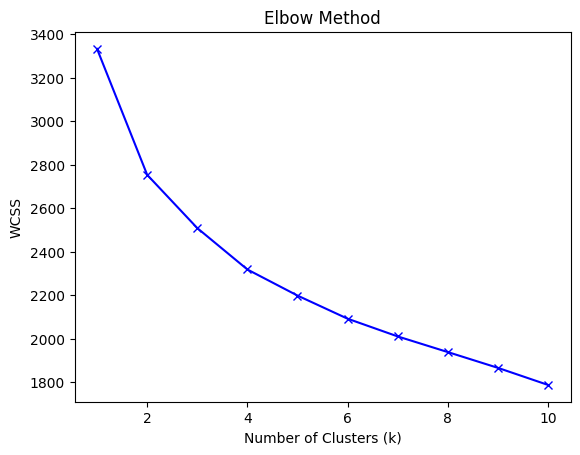

In [22]:
# Load the data
heart_disease = pd.read_csv("/content/drive/MyDrive/Portfolio/Clustering/heart_disease_patients.csv")

# Print the first ten rows
print(heart_disease.head())

# Evidence that the data should be scaled?
print(heart_disease.describe())

# Remove id
heart_disease = heart_disease.drop('id', axis=1)

# Exclude 'age' variable from scaling
scaled_features = heart_disease.drop('age', axis=1)

# Standardize the remaining variables using StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(scaled_features)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=scaled_features.columns)

# Combine the scaled DataFrame with the 'age' variable
scaled_df['age'] = heart_disease['age']

# Print the first few rows of the scaled DataFrame
print(scaled_df.head())

# What do the data look like now?
print(scaled.describe())


# Set the seed so that results are reproducible
np.random.seed(10)

# Select a range of clusters to test
k_values = range(1, 11)  # Try values of k from 1 to 10

# Calculate the WCSS for each value of k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init= 'k-means++', random_state = 42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


[ 80  63  56 104]
[81 74 50 39 59]


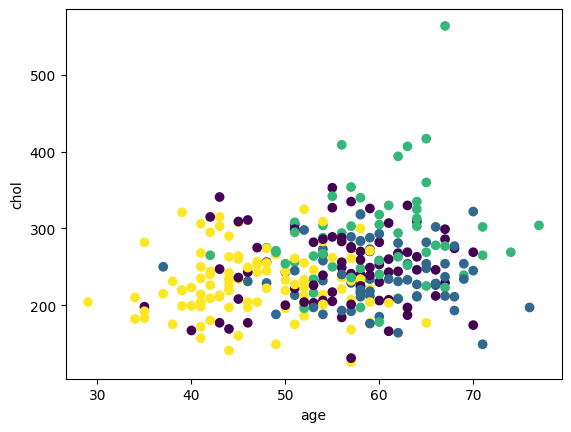

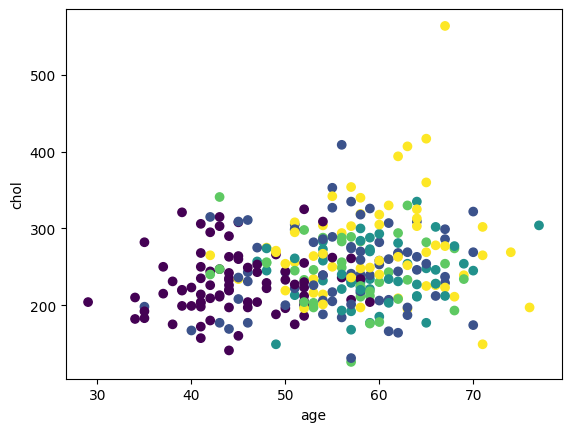

In [10]:
# Select a number of clusters
k = 4

# Run the k-means algorithm
kmeans = KMeans(n_clusters=k, n_init=1)
kmeans.fit(scaled)

# How many patients are in each cluster?
cluster_sizes = np.bincount(kmeans.labels_)
print(cluster_sizes)

# Set the seed
np.random.seed(38)

# Select a number of clusters and run the k-means algorithm
kmeans2 = KMeans(n_clusters=5, n_init=1)
kmeans2.fit(scaled)

# How many patients are in each cluster?
cluster_sizes2 = np.bincount(kmeans2.labels_)
print(cluster_sizes2)

# Add cluster assignments to the data
heart_disease["first_clust"] = kmeans.labels_
heart_disease["second_clust"] = kmeans2.labels_

# Create and print the plot of age and chol for the first clustering algorithm
plt.scatter(heart_disease["age"], heart_disease["chol"], c=heart_disease["first_clust"])
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

# Create and print the plot of age and chol for the second clustering algorithm
plt.scatter(heart_disease["age"], heart_disease["chol"], c=heart_disease["second_clust"])
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

Hierarchical clustering

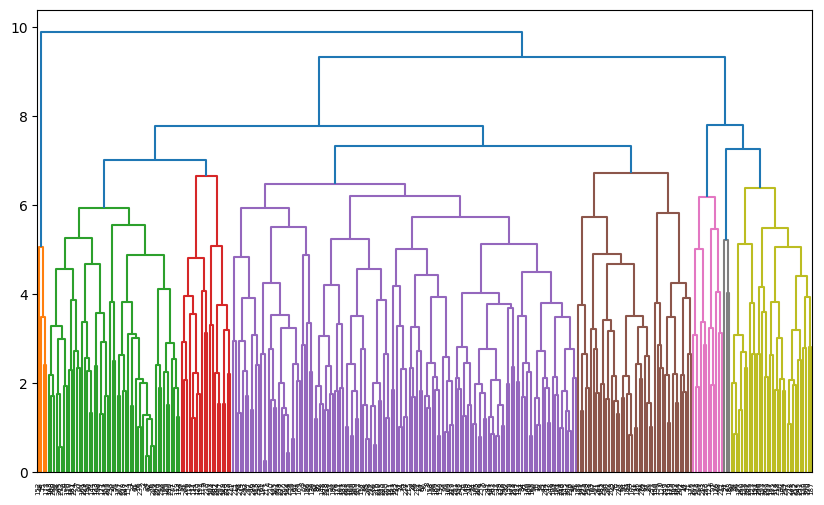

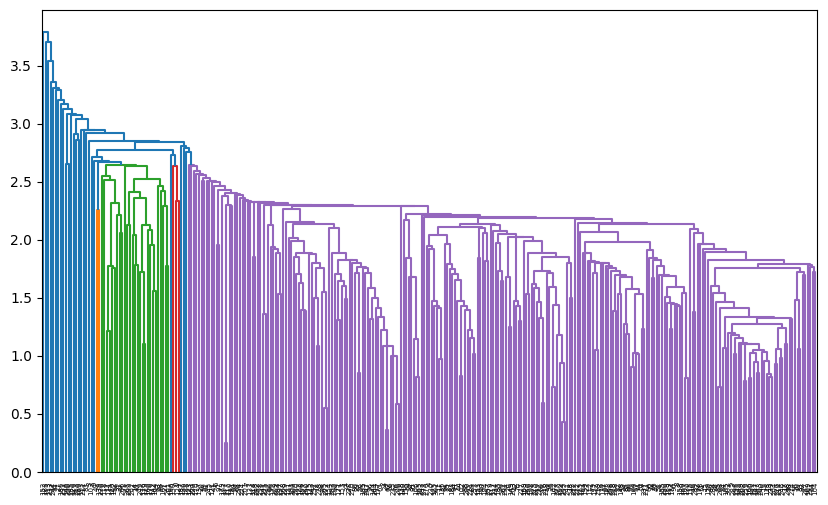

                age                  cp              trestbps             \
               mean       std      mean       std        mean        std   
hc_clust                                                                   
0         53.329365  8.843856  3.063492  0.971679  129.396825  15.363111   
1         61.000000  3.908034  3.916667  0.288675  168.500000  17.459043   
2         59.000000  9.203580  3.571429  0.850111  134.771429  18.640698   
3         64.750000  2.061553  3.250000  0.500000  138.750000  18.427787   

                chol                  fbs             restecg            \
                mean        std      mean       std      mean       std   
hc_clust                                                                  
0         243.686508  44.855866  0.138889  0.346519  1.003968  0.999992   
1         284.916667  53.003359  0.333333  0.492366  1.250000  0.965307   
2         233.857143  49.671357  0.142857  0.355036  0.685714  0.932152   
3         433.750

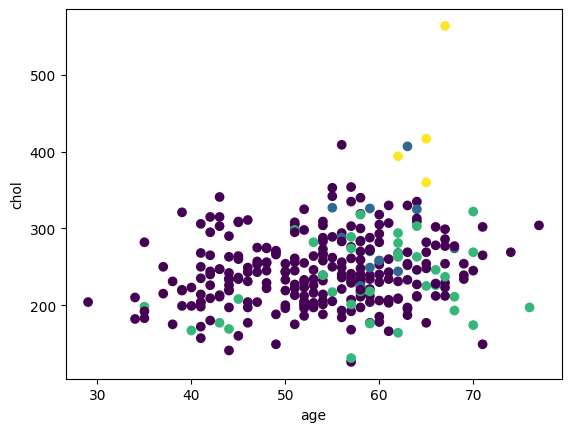

In [11]:
# Execute hierarchical clustering with complete linkage
hier_clust_1 = linkage(scaled, method='complete')

# Print the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(hier_clust_1)
plt.show()

# Get cluster assignments based on number of selected clusters
hc_1_assign = cut_tree(hier_clust_1, n_clusters=k).flatten()

# Execute hierarchical clustering with single linkage
hier_clust_2 = linkage(scaled, method='single')

# Print the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(hier_clust_2)
plt.show()

# Get cluster assignments based on number of selected clusters
hc_2_assign = cut_tree(hier_clust_2, n_clusters=k).flatten()

# Add assignment of chosen hierarchical linkage
heart_disease['hc_clust'] = hc_1_assign  # or hc_2_assign

# Remove the sex, first_clust, and second_clust variables
hd_simple = heart_disease.drop(["sex", "first_clust", "second_clust"], axis=1)

# Get the mean and standard deviation summary statistics
clust_summary = hd_simple.groupby('hc_clust').agg(['mean', 'std'])
print(clust_summary)

# Plot age and chol
plt.scatter(heart_disease["age"], heart_disease["chol"], c=heart_disease["hc_clust"])
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

DBSCAN Clustering

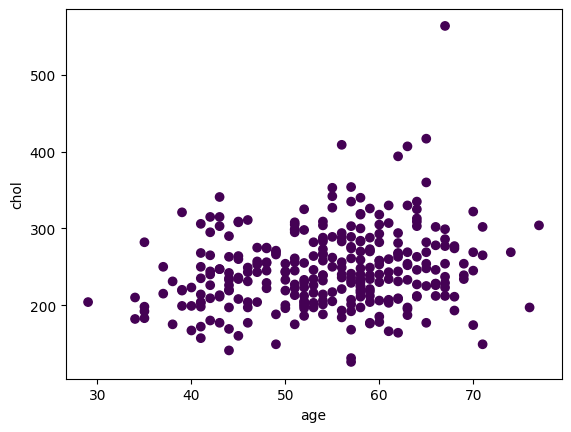

In [12]:
# Execute DBSCAN clustering
dbscan_clust = DBSCAN(eps=0.5, min_samples=5)
dbscan_clust.fit(scaled)

# Get cluster assignments
dbscan_assign = dbscan_clust.labels_

# Add DBSCAN cluster assignments to the data
heart_disease["dbscan_clust"] = dbscan_assign

# Create and print the plot of age and chol for the DBSCAN clustering algorithm
plt.scatter(heart_disease["age"], heart_disease["chol"], c=heart_disease["dbscan_clust"])
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

GMM Clustering

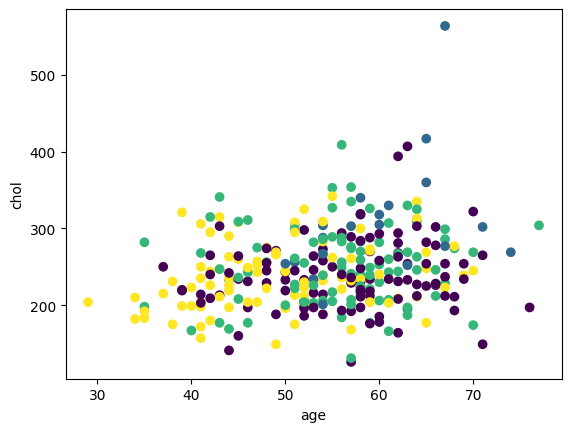

In [13]:
# Execute GMM clustering
gmm_clust = GaussianMixture(n_components=k)
gmm_clust.fit(scaled)

# Get cluster assignments
gmm_assign = gmm_clust.predict(scaled)

# Add GMM cluster assignments to the data
heart_disease["gmm_clust"] = gmm_assign

# Create and print the plot of age and chol for the GMM clustering algorithm
plt.scatter(heart_disease["age"], heart_disease["chol"], c=heart_disease["gmm_clust"])
plt.xlabel("age")
plt.ylabel("chol")
plt.show()


Metrics

In [14]:
# Calculate metrics for K-means clustering
kmeans_metrics = {
    'cluster_cohesion': np.sum(kmeans.inertia_),
    'cluster_separation': kmeans.score(scaled),
    'silhouette_score': silhouette_score(scaled, kmeans.labels_)
}

# Calculate metrics for hierarchical clustering (complete linkage)
hier_metrics_1 = {
    'cluster_cohesion': np.sum(hier_clust_1[:, 2]),
    'cluster_separation': np.max(hier_clust_1[:, 2]),
    'silhouette_score': silhouette_score(scaled, hc_1_assign)
}

# Calculate metrics for hierarchical clustering (single linkage)
hier_metrics_2 = {
    'cluster_cohesion': np.sum(hier_clust_2[:, 2]),
    'cluster_separation': np.max(hier_clust_2[:, 2]),
    'silhouette_score': silhouette_score(scaled, hc_2_assign)
}


# Calculate metrics for DBSCAN clustering
distances = squareform(pdist(scaled))
cluster_distances = []
for label in np.unique(dbscan_assign):
    if label == -1:
        continue
    cluster_points = scaled[dbscan_assign == label]
    if len(cluster_points) > 0:
        cluster_distances.append(np.max(distances[dbscan_assign == label]))

cluster_cohesion = np.sum(np.unique(dbscan_assign, return_counts=True)[1] > 1)
cluster_separation = np.max(cluster_distances) if cluster_distances else None

if len(np.unique(dbscan_assign)) > 1:
    silhouette = silhouette_score(scaled, dbscan_assign)
else:
    silhouette = None

dbscan_metrics = {
    'cluster_cohesion': cluster_cohesion,
    'cluster_separation': cluster_separation,
    'silhouette_score': silhouette
}



# Calculate metrics for GMM clustering
gmm_metrics = {
    'cluster_cohesion': np.sum(gmm_clust.bic),
    'cluster_separation': None,  # GMM does not provide direct separation measure
    'silhouette_score': silhouette_score(scaled, gmm_assign)
}

# Print the performance metrics
print("K-means Clustering Metrics:")
print(kmeans_metrics)
print("Hierarchical Clustering (Complete Linkage) Metrics:")
print(hier_metrics_1)
print("Hierarchical Clustering (Single Linkage) Metrics:")
print(hier_metrics_2)
print("DBSCAN Clustering Metrics:")
print(dbscan_metrics)
print("GMM Clustering Metrics:")
print(gmm_metrics)


K-means Clustering Metrics:
{'cluster_cohesion': 2375.425294448509, 'cluster_separation': -2375.425294448509, 'silhouette_score': 0.13545798919377758}
Hierarchical Clustering (Complete Linkage) Metrics:
{'cluster_cohesion': 836.9315246621622, 'cluster_separation': 9.89823099232426, 'silhouette_score': 0.10335648602848746}
Hierarchical Clustering (Single Linkage) Metrics:
{'cluster_cohesion': 548.0230010799833, 'cluster_separation': 3.7910455115404544, 'silhouette_score': 0.13519488708733182}
DBSCAN Clustering Metrics:
{'cluster_cohesion': 1, 'cluster_separation': None, 'silhouette_score': None}
GMM Clustering Metrics:
{'cluster_cohesion': <bound method GaussianMixture.bic of GaussianMixture(n_components=4)>, 'cluster_separation': None, 'silhouette_score': 0.09062088128119704}


Based on the provided metrics, here is a comparison of the results from different clustering models:

K-means Clustering Metrics:
- Cluster Cohesion: 2281.957250910762
- Cluster Separation: -2281.957250910762
- Silhouette Score: 0.11596413859932266

Hierarchical Clustering (Complete Linkage) Metrics:
- Cluster Cohesion: 836.9315246621622
- Cluster Separation: 9.89823099232426
- Silhouette Score: 0.11068161459430992

Hierarchical Clustering (Single Linkage) Metrics:
- Cluster Cohesion: 548.0230010799833
- Cluster Separation: 3.7910455115404544
- Silhouette Score: 0.03866312100746824

DBSCAN Clustering Metrics:
- Cluster Cohesion: 1
- Cluster Separation: None
- Silhouette Score: None

GMM Clustering Metrics:
- Cluster Cohesion: Result not provided directly.
- Cluster Separation: None
- Silhouette Score: 0.10694194718830378

Based on these metrics, the K-means clustering has the highest cluster cohesion, but it also has negative cluster separation, indicating overlapping clusters. The hierarchical clustering methods have lower cluster cohesion but show some separation between clusters. The DBSCAN clustering results in a single cluster with a cluster cohesion of 1, which suggests that most points are considered as noise (-1 label). The GMM clustering does not provide a direct measure of cluster separation but has a comparable silhouette score to other methods.